In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
#Relevant Libraries Import

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
#import shap
#%matplotlib inline
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
#from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score , recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Telco_customer_churn.xlsx')

In [ ]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

# EDA And Data Cleaning

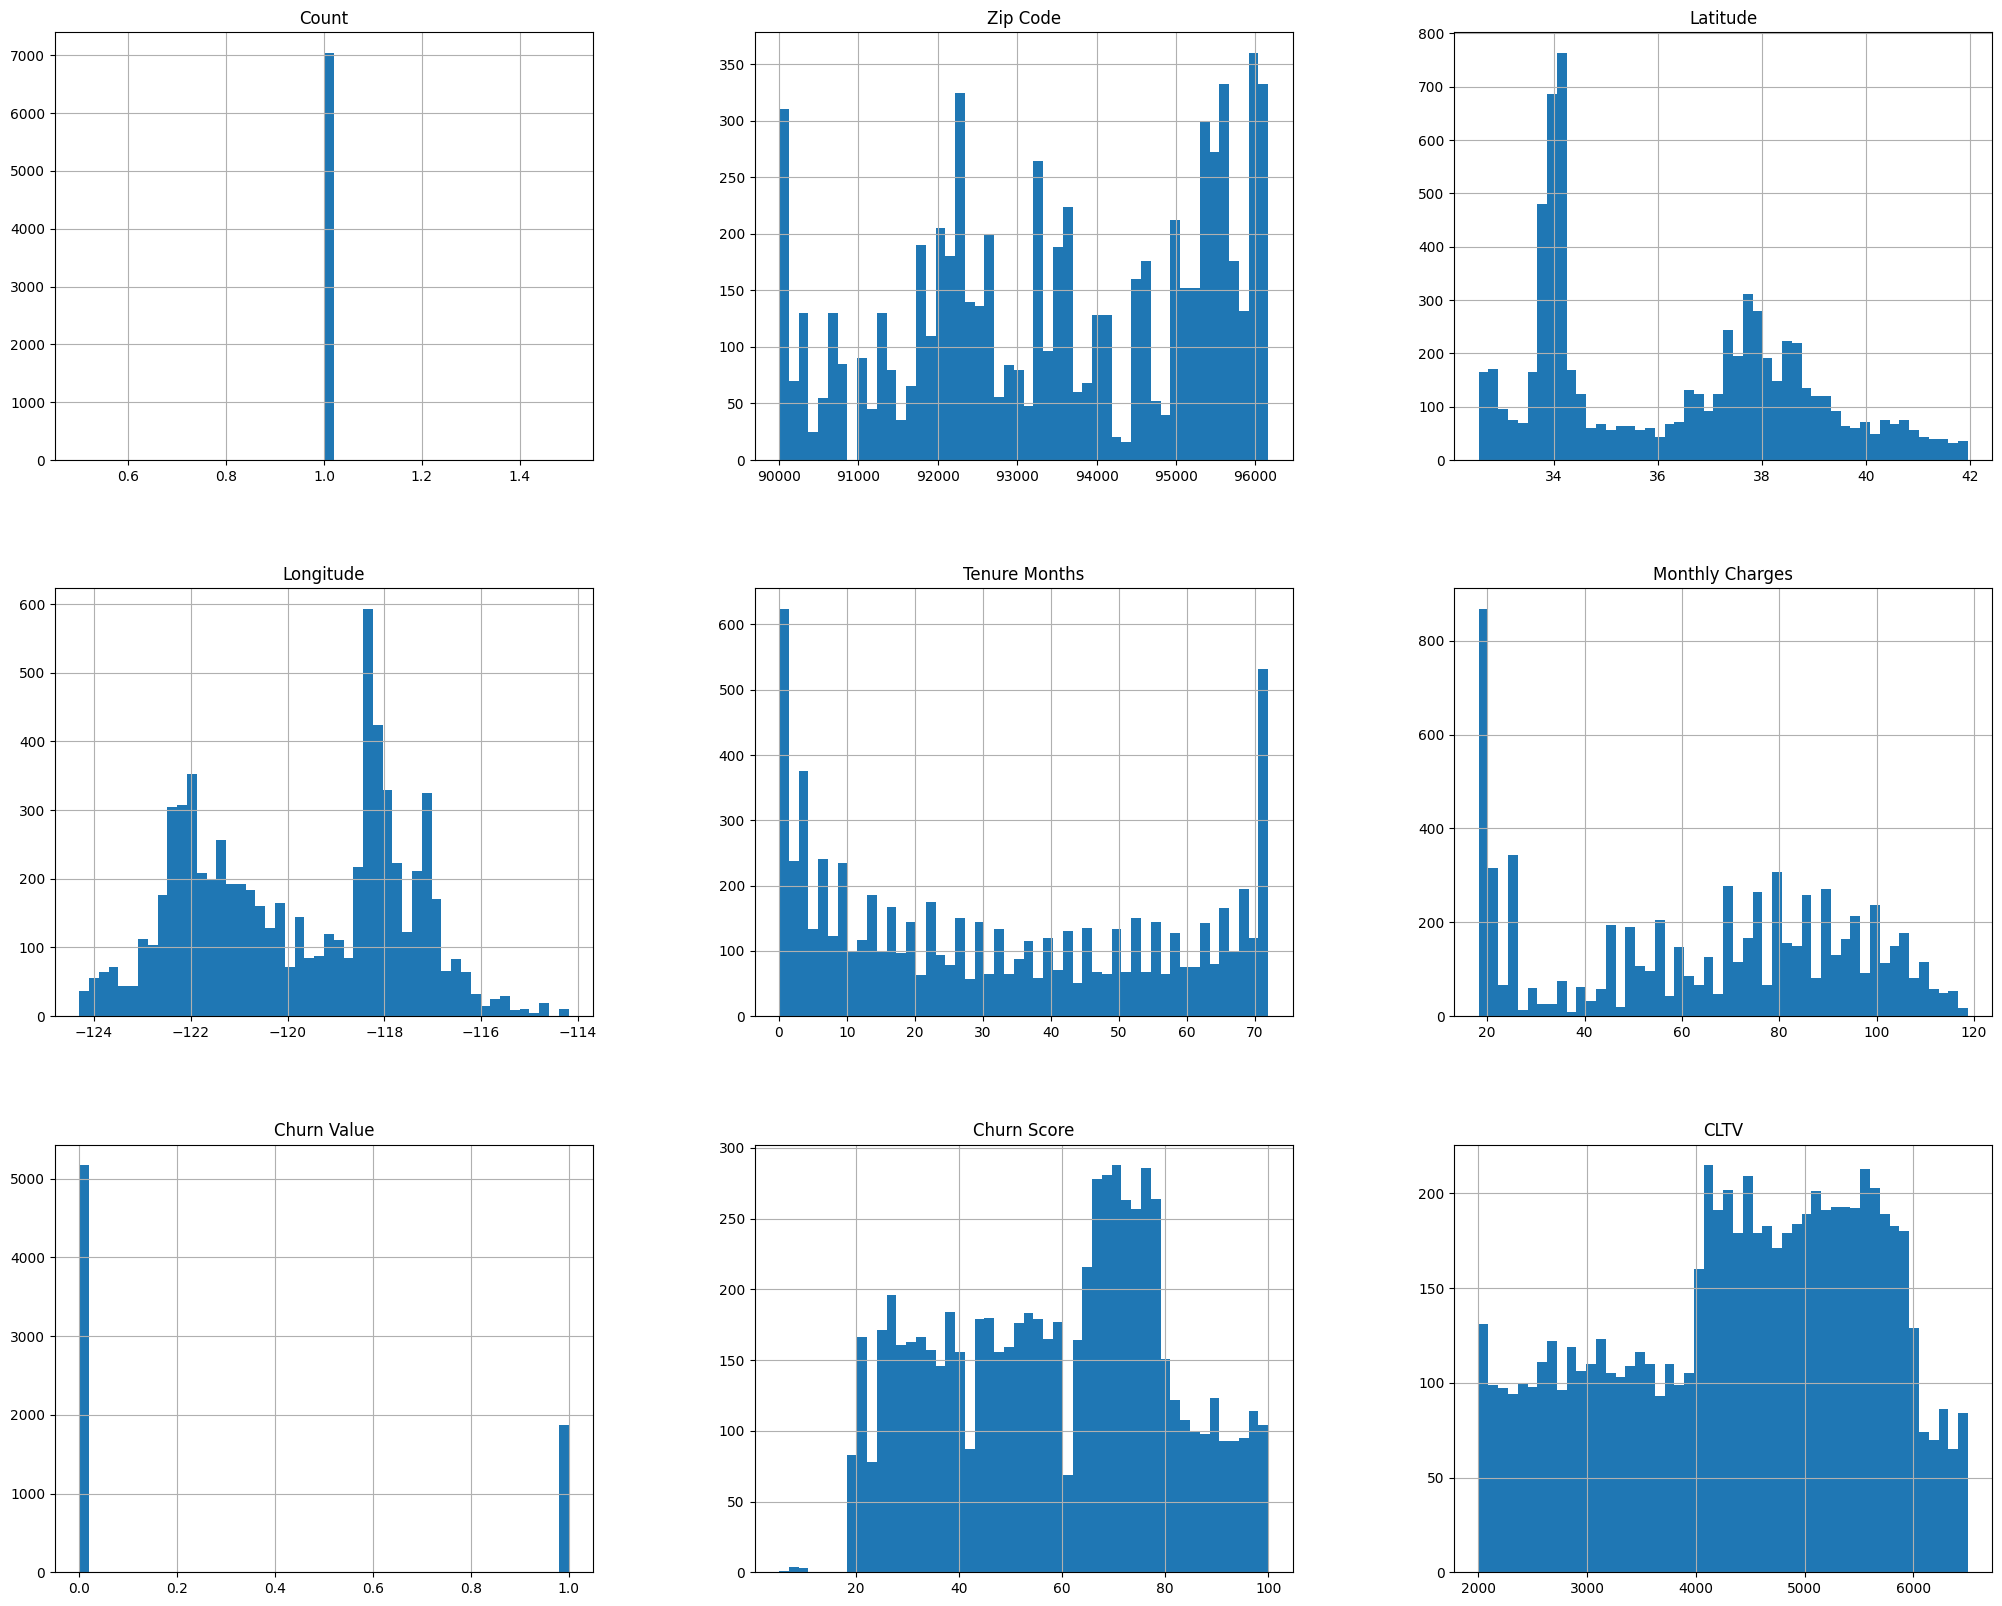

In [ ]:
df.hist(bins=50, figsize=(25, 20))
plt.show()

In [ ]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [ ]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [ ]:
df.duplicated().sum()


0

**CustomerID:** This is a unique identifier for each customer and doesn't contribute to the churn prediction

**State, Country,:**
Regarding Telco services, geographic data such as State, Country, might not be directly associated with customer attrition. Generally speaking, these specifics are more pertinent for other kinds of analysis, such as market segmentation. This is an unwanted column with only one unique value.

**Count :** This is an unwanted column with only one unique value.


**Churn Reason:**
Churn Reason may not be suitable for predictive models, but it can provide insights into why consumers leave. However, it's often not feasible to anticipate churn before it occurs, as the cause may not be known. This is particularly useful in model training, as reasons for moving will arise post-churn, not before they leave. This is likely known only after a customer has churned and thus isn't useful for prediction. Also, it has many missing values.

**Churn Label:**
 Adding Churn_Label could cause redundancy as you already have a target variable named Churn_Value. Usually, it is optional to have both the original target variable (Churn_Value) and the target variable's binary counterpart (Churn_Label). This is likely a descriptive label of the 'Churn Value' (e.g., Yes/No), making it redundant.

 **Churn Score:**  this is derived from the target variable 'Churn Value', it should be excluded to prevent data leakage.

 **Lat Long:** we have separate latitude and longitude columns


In [ ]:
df.drop(["CustomerID", "State","Country", "Count", "Churn Reason", "Churn Label", "Lat Long","Churn Score"],
       axis=1 , inplace= True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Zip Code           7043 non-null   int64  
 2   Latitude           7043 non-null   float64
 3   Longitude          7043 non-null   float64
 4   Gender             7043 non-null   object 
 5   Senior Citizen     7043 non-null   object 
 6   Partner            7043 non-null   object 
 7   Dependents         7043 non-null   object 
 8   Tenure Months      7043 non-null   int64  
 9   Phone Service      7043 non-null   object 
 10  Multiple Lines     7043 non-null   object 
 11  Internet Service   7043 non-null   object 
 12  Online Security    7043 non-null   object 
 13  Online Backup      7043 non-null   object 
 14  Device Protection  7043 non-null   object 
 15  Tech Support       7043 non-null   object 
 16  Streaming TV       7043 

In [ ]:
df.isnull().sum()

City                 0
Zip Code             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Value          0
CLTV                 0
dtype: int64

# Data Transform

In [ ]:

# List of columns to encode
columns_to_encode = ['Dependents','Partner','Senior Citizen','Gender','City','Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']


for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])






In [ ]:
# List of columns to encode
#columns_to_encode = ['Dependents', 'Partner', 'Senior Citizen', 'Gender', 'City', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']


#df_encoded = pd.get_dummies(df, columns=columns_to_encode)

#df = pd.concat([df.drop(columns=columns_to_encode), df_encoded], axis=1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   int64  
 1   Zip Code           7043 non-null   int64  
 2   Latitude           7043 non-null   float64
 3   Longitude          7043 non-null   float64
 4   Gender             7043 non-null   int64  
 5   Senior Citizen     7043 non-null   int64  
 6   Partner            7043 non-null   int64  
 7   Dependents         7043 non-null   int64  
 8   Tenure Months      7043 non-null   int64  
 9   Phone Service      7043 non-null   int64  
 10  Multiple Lines     7043 non-null   int64  
 11  Internet Service   7043 non-null   int64  
 12  Online Security    7043 non-null   int64  
 13  Online Backup      7043 non-null   int64  
 14  Device Protection  7043 non-null   int64  
 15  Tech Support       7043 non-null   int64  
 16  Streaming TV       7043 

In [ ]:
# Convert 'Total Charges' column to numeric, handling errors by coercing to NaN
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   int64  
 1   Zip Code           7043 non-null   int64  
 2   Latitude           7043 non-null   float64
 3   Longitude          7043 non-null   float64
 4   Gender             7043 non-null   int64  
 5   Senior Citizen     7043 non-null   int64  
 6   Partner            7043 non-null   int64  
 7   Dependents         7043 non-null   int64  
 8   Tenure Months      7043 non-null   int64  
 9   Phone Service      7043 non-null   int64  
 10  Multiple Lines     7043 non-null   int64  
 11  Internet Service   7043 non-null   int64  
 12  Online Security    7043 non-null   int64  
 13  Online Backup      7043 non-null   int64  
 14  Device Protection  7043 non-null   int64  
 15  Tech Support       7043 non-null   int64  
 16  Streaming TV       7043 

In [ ]:
df.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,CLTV
0,562,90003,33.964131,-118.272783,1,0,0,0,2,1,...,0,0,0,0,1,3,53.85,108.15,1,3239
1,562,90005,34.059281,-118.307420,0,0,0,1,2,1,...,0,0,0,0,1,2,70.70,151.65,1,2701
2,562,90006,34.048013,-118.293953,0,0,0,1,8,1,...,0,2,2,0,1,2,99.65,820.50,1,5372
3,562,90010,34.062125,-118.315709,0,0,1,1,28,1,...,2,2,2,0,1,2,104.80,3046.05,1,5003
4,562,90015,34.039224,-118.266293,1,0,0,1,49,1,...,0,2,2,0,1,0,103.70,5036.30,1,5340


# For Scaling the data the


In [ ]:
#from sklearn.preprocessing import StandardScaler

#stan_scaler = StandardScaler()

#df1 = pd.DataFrame(stan_scaler.fit_transform(df),columns = df.columns)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler instance
minmax_scaler = MinMaxScaler()

# Apply normalization to the entire dataframe
df1 = pd.DataFrame(minmax_scaler.fit_transform(df), columns=df.columns)


In [ ]:
df1.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,CLTV
0,0.498227,0.000325,0.149719,0.596390,1.0,0.0,0.0,0.0,0.027778,1.0,...,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229,0.010310,1.0,0.274850
1,0.498227,0.000649,0.159835,0.592963,0.0,0.0,0.0,1.0,0.027778,1.0,...,0.0,0.0,0.0,0.0,1.0,0.666667,0.521891,0.015330,1.0,0.155215
2,0.498227,0.000812,0.158637,0.594296,0.0,0.0,0.0,1.0,0.111111,1.0,...,0.0,1.0,1.0,0.0,1.0,0.666667,0.809950,0.092511,1.0,0.749166
3,0.498227,0.001461,0.160137,0.592143,0.0,0.0,1.0,1.0,0.388889,1.0,...,1.0,1.0,1.0,0.0,1.0,0.666667,0.861194,0.349325,1.0,0.667111
4,0.498227,0.002273,0.157702,0.597032,1.0,0.0,0.0,1.0,0.680556,1.0,...,0.0,1.0,1.0,0.0,1.0,0.000000,0.850249,0.578987,1.0,0.742050


# Feature Engineering python tools

In [ ]:
pip install featurewiz

Imported 0.3.2 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False, skip_xgboost=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_L

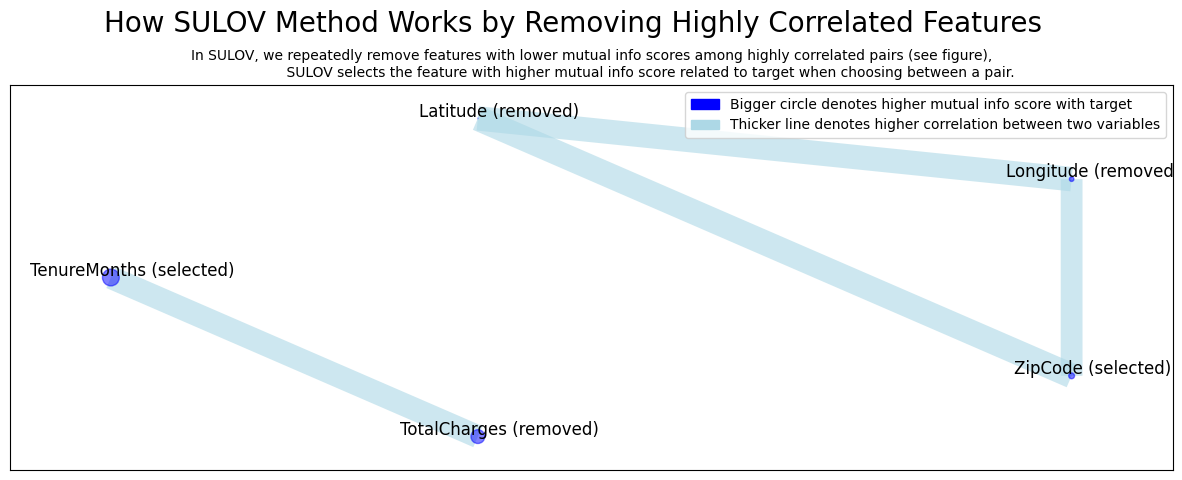

Time taken for SULOV method = 1 seconds
    Adding 0 categorical variables to reduced numeric variables  of 21
Final list of selected 21 vars after SULOV = ['City', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'CLTV', 'TenureMonths', 'ZipCode']
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
    Taking top 6 features per iteration...
    XGBoost version using 1.7.6 as tree method: gpu_hist
    Number of booster rounds = 100
        Selected: ['Contract', 'Month

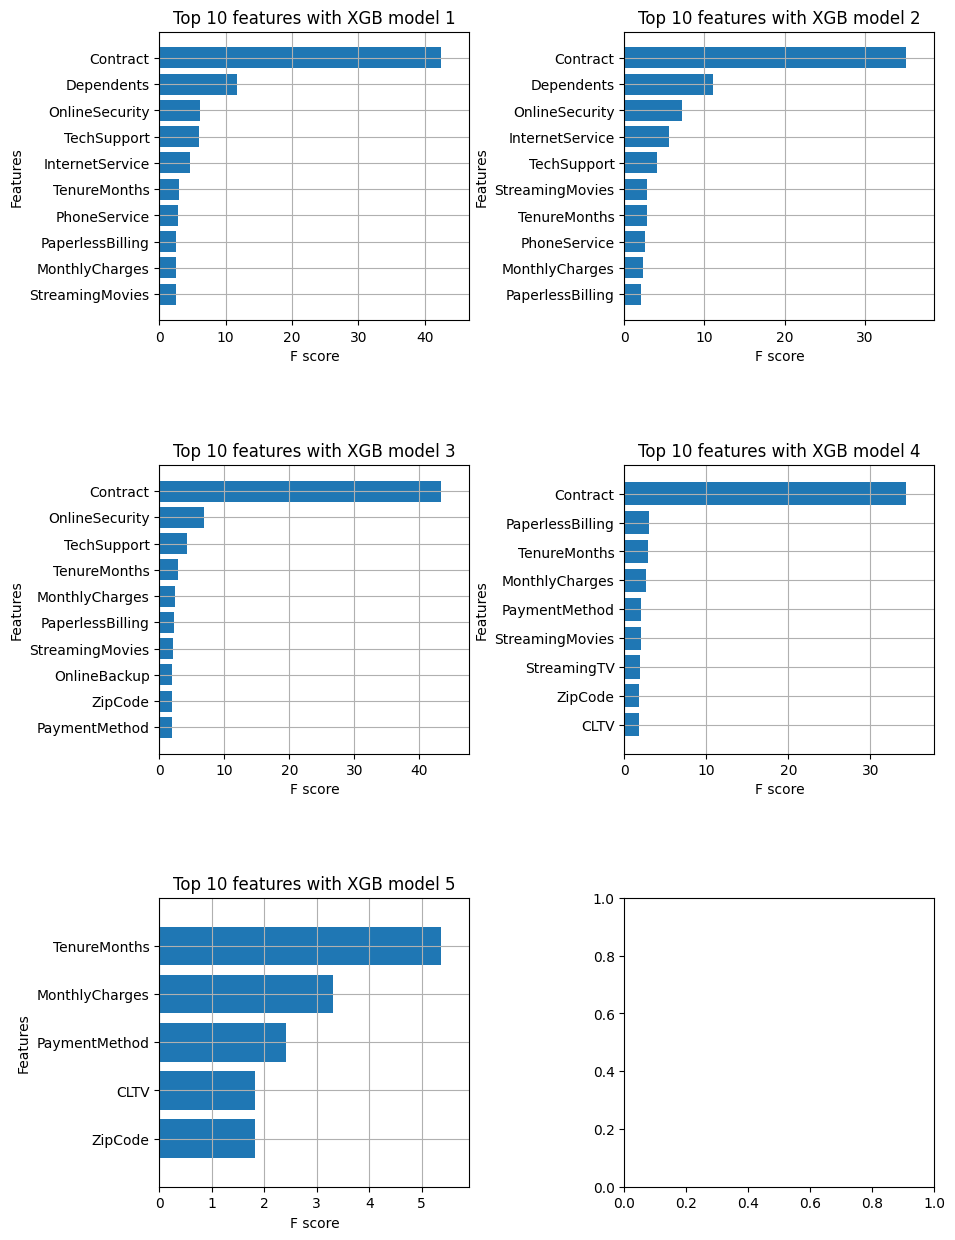

    Completed XGBoost feature selection in 3 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 9 important features:
['Contract', 'MonthlyCharges', 'TenureMonths', 'CLTV', 'ZipCode', 'City', 'Dependents', 'OnlineSecurity', 'PaymentMethod']
Total Time taken for featurewiz selection = 22 seconds
Output contains a list of 9 important features and a train dataframe


In [ ]:
from featurewiz import featurewiz
target = 'Churn Value'

features= featurewiz(df1, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

Final feature by featurewiz

In [ ]:
FinalfeatureByFeaturewiz=['Contract', 'MonthlyCharges', 'TenureMonths', 'CLTV', 'ZipCode', 'City', 'Dependents', 'OnlineSecurity', 'PaymentMethod']



***After selecting the imporant features using featurewiz ,  there is some important feature might be important for the churn prediction. so rest feature is selected manually with the specif reason.***

**Partner :** Family status  influence customer behavior and preferences.

**Phone Service, Multiple Lines:**Types of services used  influence satisfaction and churn.


**Internet Service,Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies:** These services/features  significantly impact customer satisfaction.

**Paperless Billing:** Billing methods  influence customer satisfaction.

**Payment Method**:Different payment methods might correlate with customer preferences and churn likelihood.

In [ ]:

featuresnewfromfeaturewiz=['Contract', 'MonthlyCharges', 'TenureMonths', 'CLTV', 'ZipCode', 'City', 'Dependents', 'OnlineSecurity', 'PaymentMethod'
'Partner','Phone Service','Multiple Lines','Internet Service','Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies','Paperless Billing' ]


In [ ]:
df1.drop(["Latitude", "Longitude","Senior Citizen", "Total Charges"],axis=1 , inplace= True)

In [ ]:
features_for_lime=featuresnewfromfeaturewiz

In [ ]:
df1.columns

Index(['City', 'Zip Code', 'Gender', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Churn Value', 'CLTV'],
      dtype='object')

In [ ]:
df1.head()

,City,Zip Code,Gender,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Churn Value,CLTV
0,0.498227,0.000325,1.0,0.0,0.0,0.027778,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229,1.0,0.274850
1,0.498227,0.000649,0.0,0.0,1.0,0.027778,1.0,0.0,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.521891,1.0,0.155215
2,0.498227,0.000812,0.0,0.0,1.0,0.111111,1.0,1.0,0.5,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.666667,0.809950,1.0,0.749166
3,0.498227,0.001461,0.0,1.0,1.0,0.388889,1.0,1.0,0.5,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.666667,0.861194,1.0,0.667111
4,0.498227,0.002273,1.0,0.0,1.0,0.680556,1.0,1.0,0.5,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.850249,1.0,0.742050


# Heatmap

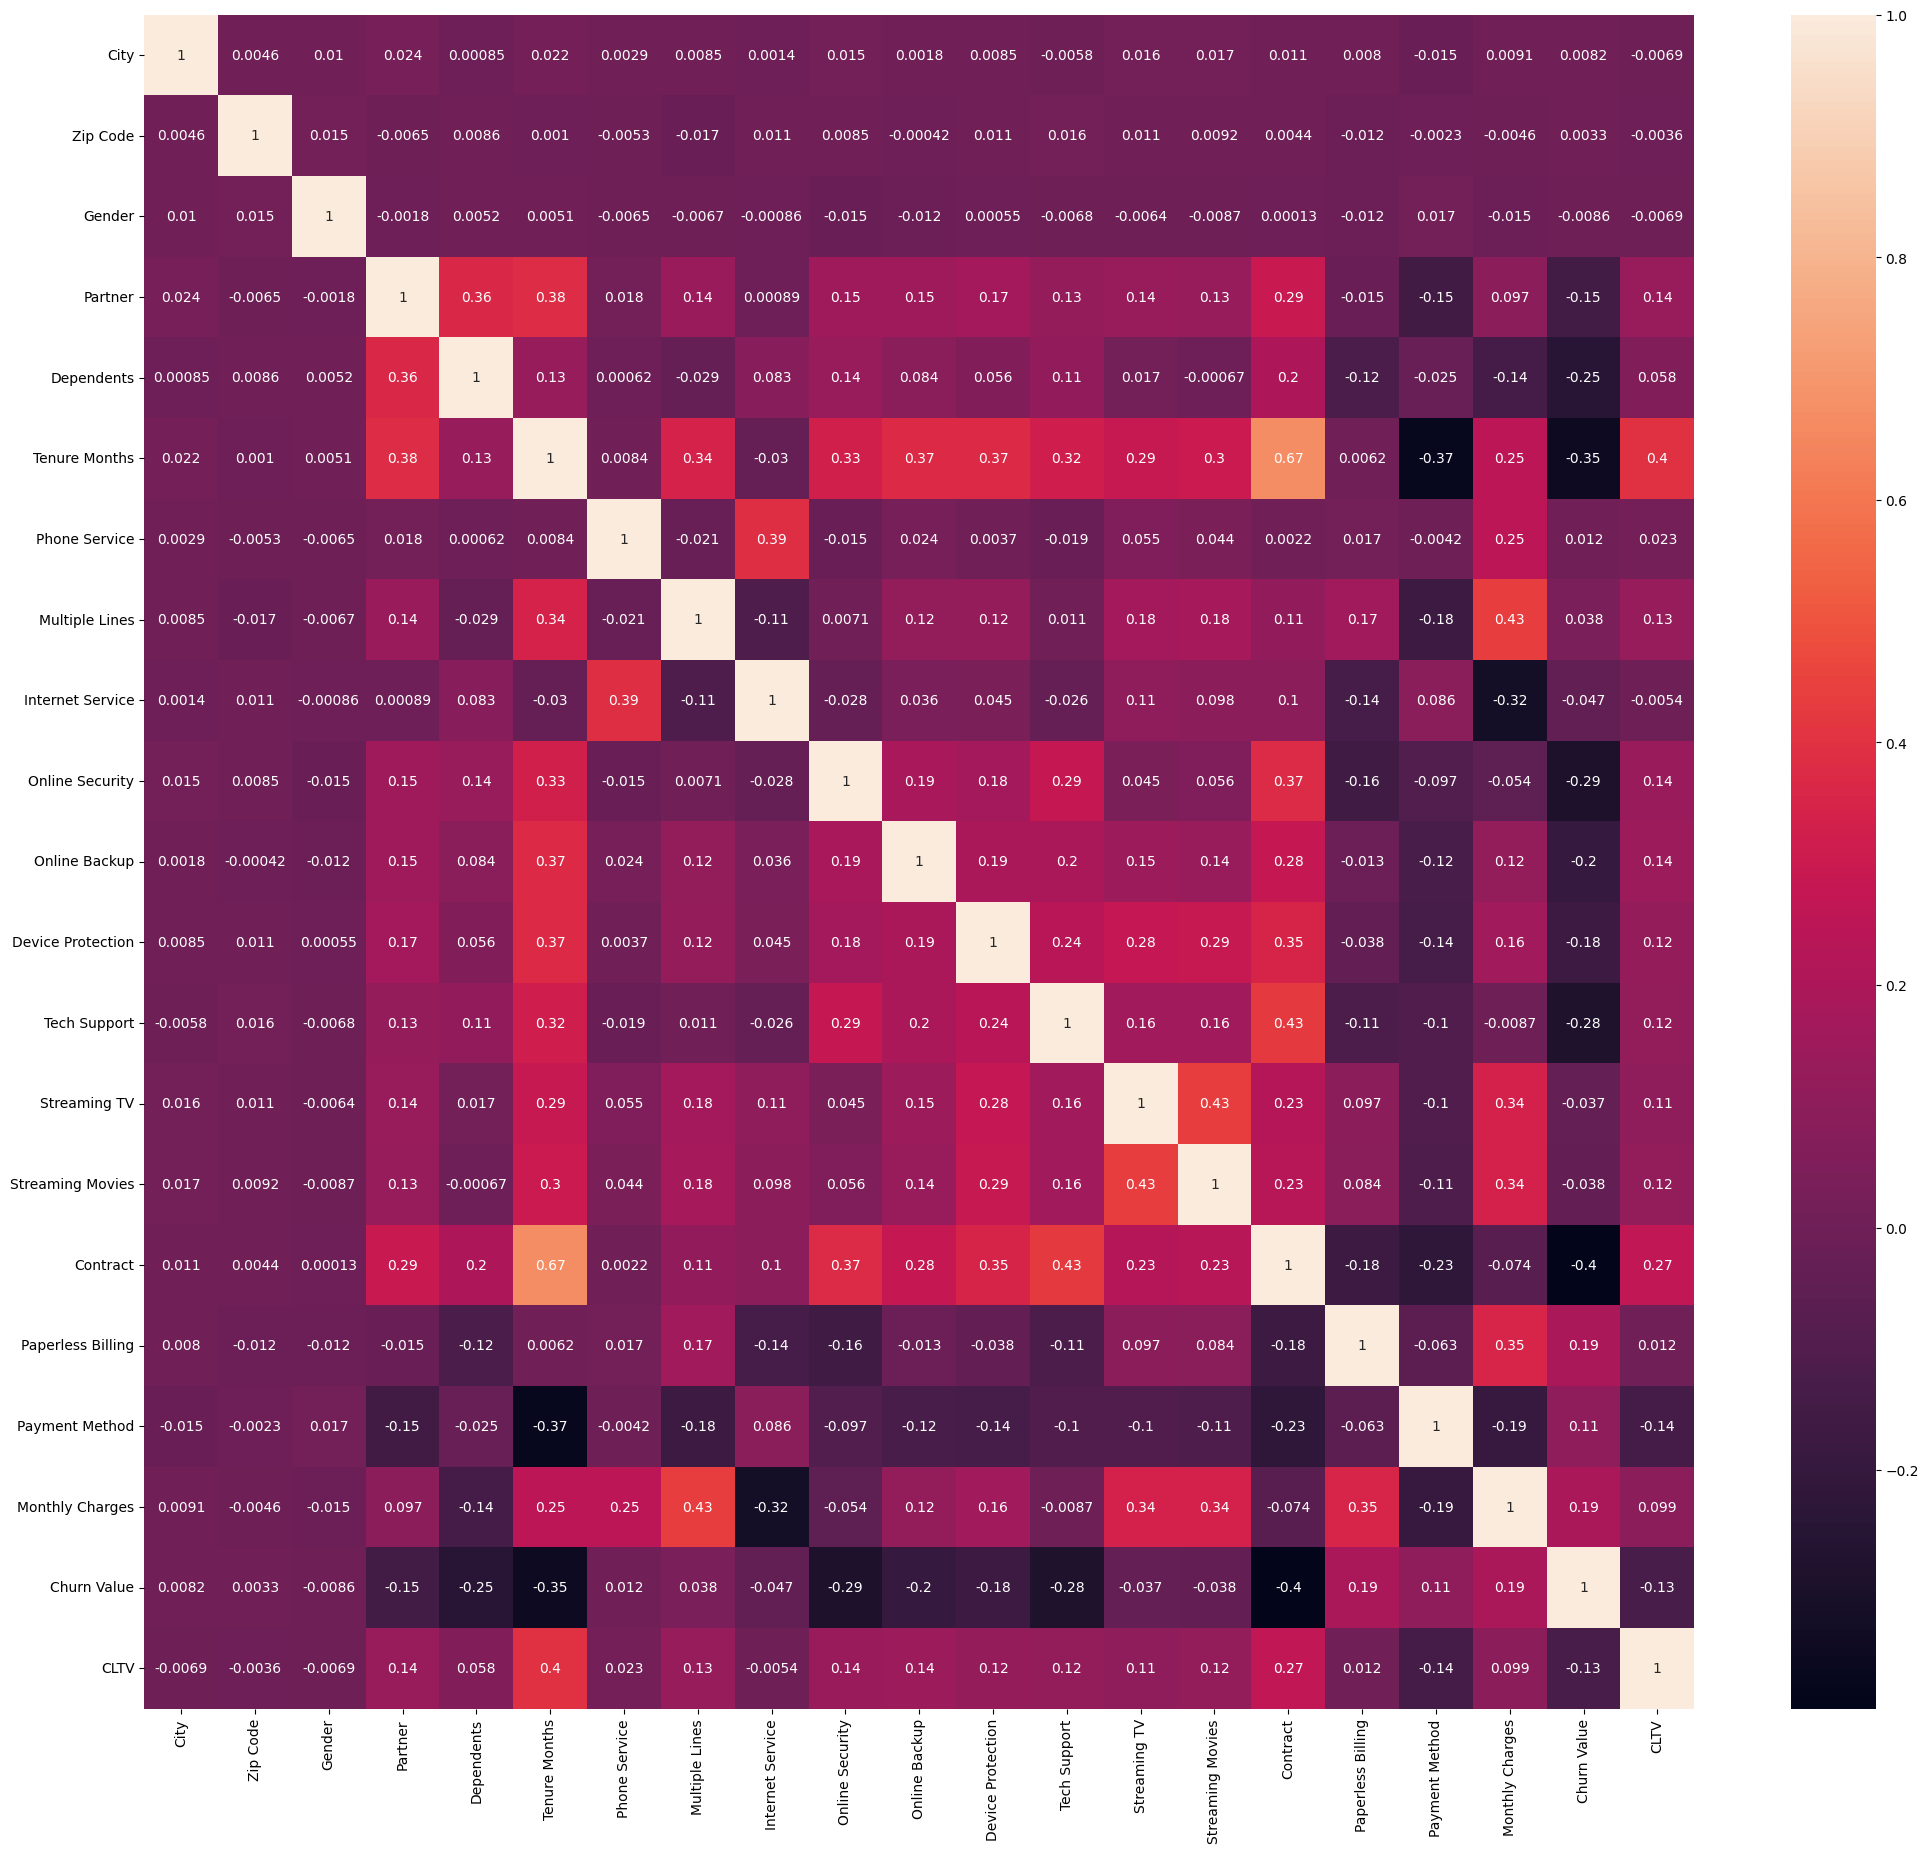

In [ ]:
plt.figure(figsize=(25,22))
sns.heatmap(df1.corr(), annot=True)
plt.show()

In [ ]:
X=df1.drop("Churn Value", axis=1 )
y=df1['Churn Value']

In [ ]:
X.shape


(7043, 20)

In [ ]:
y.shape

(7043,)

In [ ]:
#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [ ]:
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (5634, 20)
Number transactions y_train dataset:  (5634,)
Number transactions X_test dataset:  (1409, 20)
Number transactions y_test dataset:  (1409,)


 Model Performance evalution using ( Accuracy , precision , recall, f1, weigheted and Macro average of precission,  recall,  f1,)

Regressor metrics ( MSE, MSLE, MAE, RMSE)

Confusion Matrix

              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81      1035
         1.0       0.47      0.48      0.48       374

    accuracy                           0.72      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.72      0.72      1409

mse= 0.2803406671398155
msle= 0.13469051845116362
mae= 0.2803406671398155
rmse= 0.5294720645509218


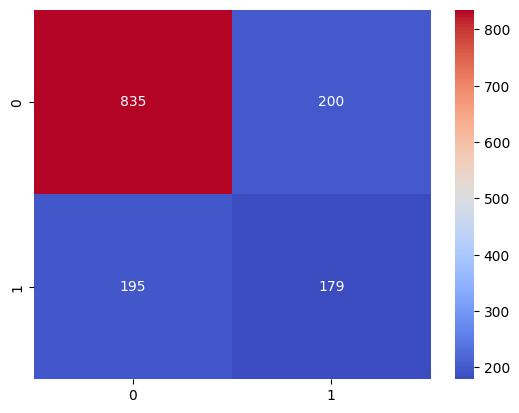

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train.ravel())
predictions = DT.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

cm=confusion_matrix(y_test, predictions)

labels = np.unique(predictions)
sns.heatmap(cm, annot=True, cmap="coolwarm",fmt='.0f')
plt.show()


              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1035
         1.0       0.66      0.53      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409

mse= 0.19659332860184528
msle= 0.09445385724296793
mae= 0.19659332860184528
rmse= 0.44338846241399343


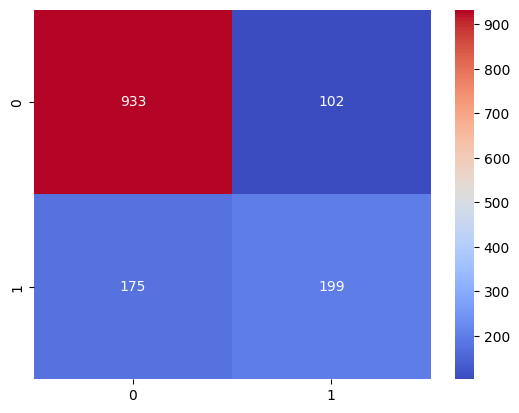

In [ ]:
# random Forest classifier machine object
RF =RandomForestClassifier(max_depth=10, random_state=100)
# train the model on train set
RF.fit(X_train, y_train.ravel())

predictions2 = RF.predict(X_test)

# print classification report
print(classification_report(y_test, predictions2))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions2))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions2))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions2))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions2)))



cm=confusion_matrix(y_test, predictions2)

labels = np.unique(predictions2)
sns.heatmap(cm, annot=True, cmap="coolwarm",fmt='.0f')
plt.show()



              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      1035
         1.0       0.67      0.59      0.62       374

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409

mse= 0.18665720369056069
msle= 0.08968001608267351
mae= 0.18665720369056069
rmse= 0.43203842848820834


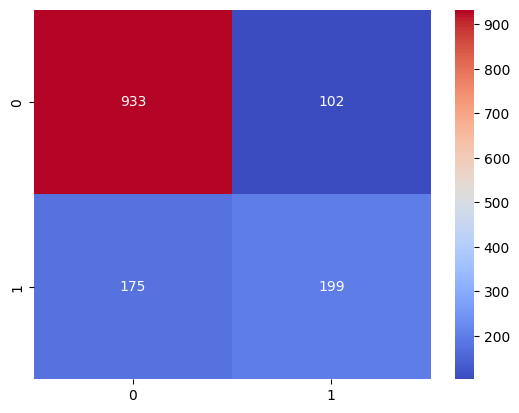

In [ ]:
# logistic regression classifier machine object
LR =LogisticRegression()
# train the model on train set
LR.fit(X_train, y_train.ravel())

predictions3 = LR.predict(X_test)

# print classification report
print(classification_report(y_test, predictions3))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions3))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions3))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions3))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions3)))


labels = np.unique(predictions3)
sns.heatmap(cm, annot=True, cmap="coolwarm",fmt='.0f')
plt.show()
cm=confusion_matrix(y_test, predictions3)


              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      1035
         1.0       0.64      0.53      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

mse= 0.2036905606813343
msle= 0.09786374378603534
mae= 0.2036905606813343
rmse= 0.45132090654138135


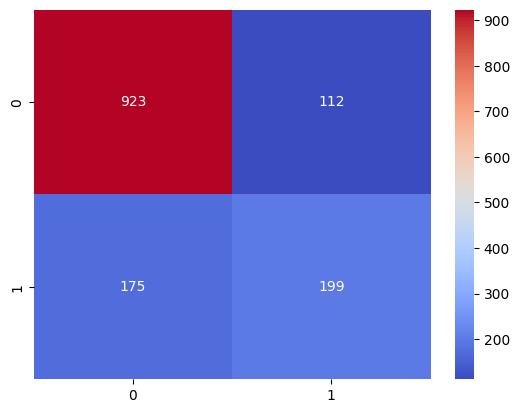

In [ ]:

XGB = XGBClassifier()

# train the model on train set
XGB.fit(X_train, y_train.ravel())

predictions4 = XGB.predict(X_test)

# print classification report
print(classification_report(y_test, predictions4))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions4))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions4))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions4))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions4)))


cm=confusion_matrix(y_test, predictions4)

labels = np.unique(predictions4)
sns.heatmap(cm, annot=True, cmap="coolwarm",fmt='.0f')
plt.show()

# Precisssion Recall curve

precision= 0.6697247706422018
recall= 0.5855614973262032
f1= 0.6248216833095578


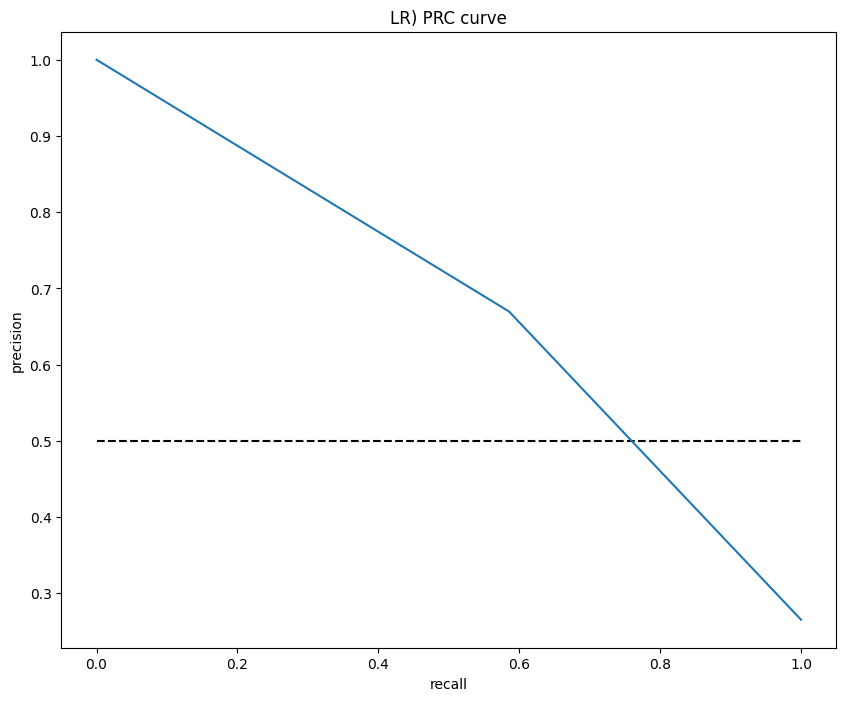

In [ ]:

precision=precision_score(y_test, predictions3)
recall=recall_score(y_test, predictions3)
f1=f1_score(y_test, predictions3)
print('precision=',precision)
print('recall=',recall)
print('f1=',f1)

precision, recall, thresholds = precision_recall_curve(y_test, predictions3)

plt.figure(figsize = (10,8))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall, precision, label = 'LR')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('LR) PRC curve')
plt.show()



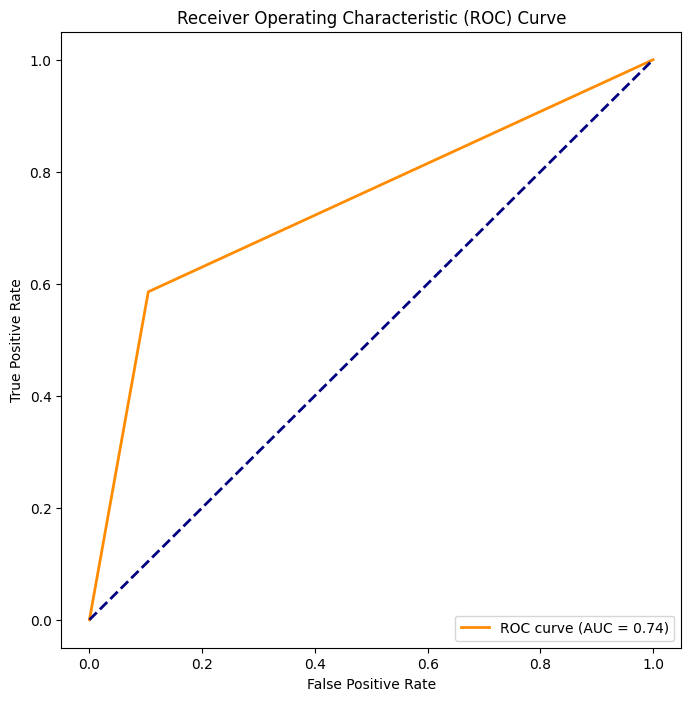

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, predictions3)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Orginal vs prediction visuliaziation

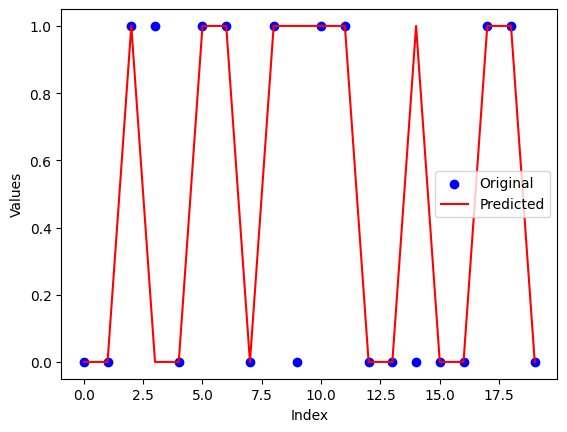

In [ ]:

x = list(range(20))
y_display = y_test[:20]
predictions_display = predictions3[:20]
plt.scatter(x, y_display, color="blue", label="Original")
plt.plot(x, predictions_display, color="red", label="Predicted")
plt.xlabel("Index")
plt.ylabel("Values")
plt.legend()
plt.show()


# Hyperparameter tunning

In [ ]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300],
    'class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(LR, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

accuracy = grid_search.score(X_test, y_test)
print("Accuracy on the test set:", accuracy)

Best hyperparameters: {'C': 0.1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy on the test set: 0.8090844570617459


# Cross validation

In [ ]:

cv_scores_lr = cross_val_score(LR, X, y, cv=5)

mean_accuracy_lr = np.mean(cv_scores_lr) * 100
mean_accuracy_lr = round(mean_accuracy_lr, 2)

print("Cross-validation Scores:", cv_scores_lr)
print("Mean Accuracy (%):", mean_accuracy_lr)

Cross-validation Scores: [0.8012775  0.82611781 0.79488999 0.80752841 0.80681818]
Mean Accuracy (%): 80.73


# K flod validation

In [ ]:


kfold = KFold(n_splits=10)

scores = cross_val_score(LR, X, y, cv=kfold)

for fold, score in enumerate(scores):
    print(f"Fold {fold+1} Accuracy: {score}")

mean_accuracy = np.mean(scores)
print("Mean Accuracy:", mean_accuracy)

Fold 1 Accuracy: 0.3645390070921986
Fold 2 Accuracy: 0.4198581560283688
Fold 3 Accuracy: 0.6510638297872341
Fold 4 Accuracy: 0.8792613636363636
Fold 5 Accuracy: 0.8721590909090909
Fold 6 Accuracy: 0.8707386363636364
Fold 7 Accuracy: 0.859375
Fold 8 Accuracy: 0.8622159090909091
Fold 9 Accuracy: 0.8792613636363636
Fold 10 Accuracy: 0.8821022727272727
Mean Accuracy: 0.7540574629271437


# Explainable artificial intelligence (XAI)

In [ ]:
pip install shap

In [ ]:
import shap



In [ ]:
explainer = shap.TreeExplainer(RF)
shap_values = explainer.shap_values(X)
expected_value = explainer.expected_value

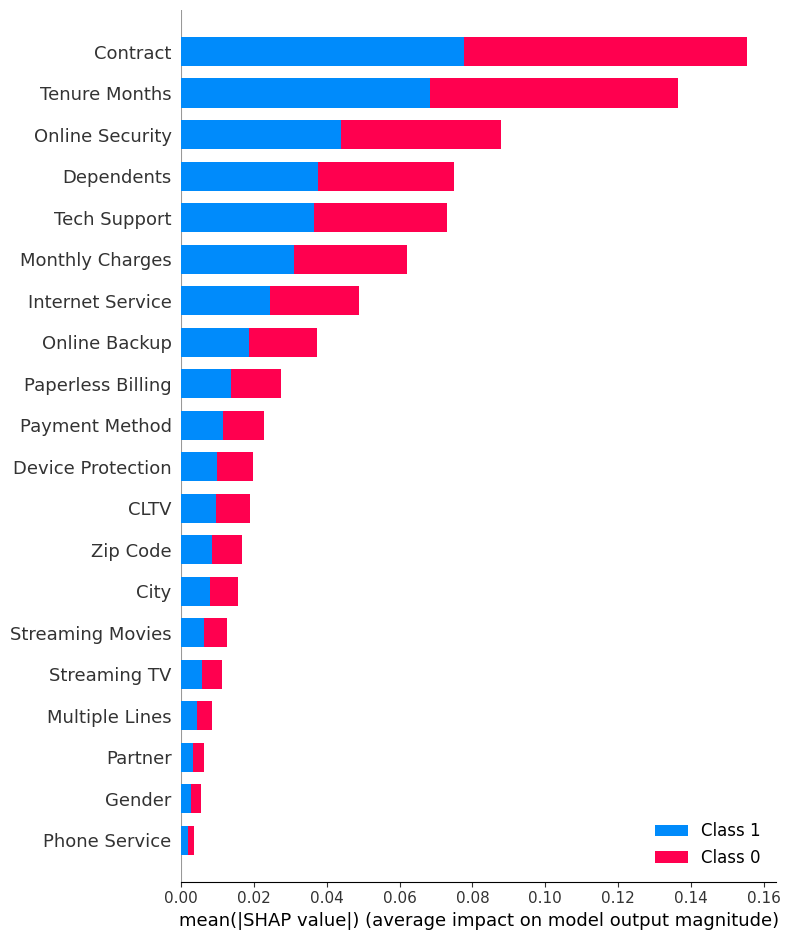

In [ ]:
# Generate summary dot plot
shap.summary_plot(shap_values, X,title="SHAP summary plot")

In [ ]:
pip install explainerdashboard

In [ ]:
import explainerdashboard as expdb
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
from explainerdashboard import InlineExplainer
from explainerdashboard.custom import (ImportancesComposite,
                                       IndividualPredictionsComposite,
                                       WhatIfComposite,
                                       ShapDependenceComposite,
                                       ShapInteractionsComposite,
                                       DecisionTreesComposite)

In [ ]:
X_train = pd.DataFrame(X_train, columns = X.columns)

X_test = pd.DataFrame(X_test, columns=X.columns)

In [ ]:
# Create the explainer object
explainer = ClassifierExplainer(LR, X_test, y_test,model_output='logodds')

Note: shap values for shap='linear' get calculated against X_background, but paramater X_background=None, so using X instead...
Generating self.shap_explainer = shap.LinearExplainer(model, X)...


In [ ]:
ie = InlineExplainer(explainer)

In [ ]:
ie.shap.overview()


Calculating shap values...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# `Prediction system`

In [ ]:
input_data = ([0.498227, 0.000325, 1.0, 0.0, 0.0, 0.027778, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.000000, 0.354229, 0.274850])

input_data_np = np.asarray(input_data).reshape(1, -1)

prediction = LR.predict(input_data_np)

print("Predicted Output:", prediction[0])

if prediction[0] == 0:
    print('the customer remained with the company.')
else:
    print('the customer left the company this quarter')

Predicted Output: 0.0
the customer remained with the company.


# For Bonus

***Geographic Analysis of Churn:***

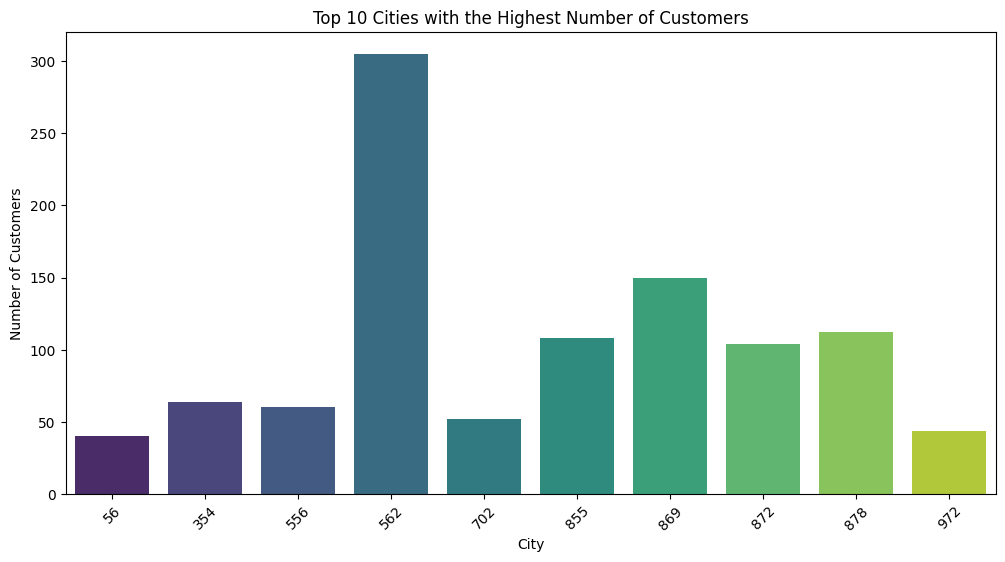

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



# Group by 'City' and count the number of customers in each city
city_customer_counts = df['City'].value_counts()

# Get the top 10 cities with the highest number of customers
top_10_cities = city_customer_counts.head(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_cities.index, y=top_10_cities.values, palette='viridis')
plt.title('Top 10 Cities with the Highest Number of Customers')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)  # Rotate city names for better readability
plt.show()


# Demographic Analysis


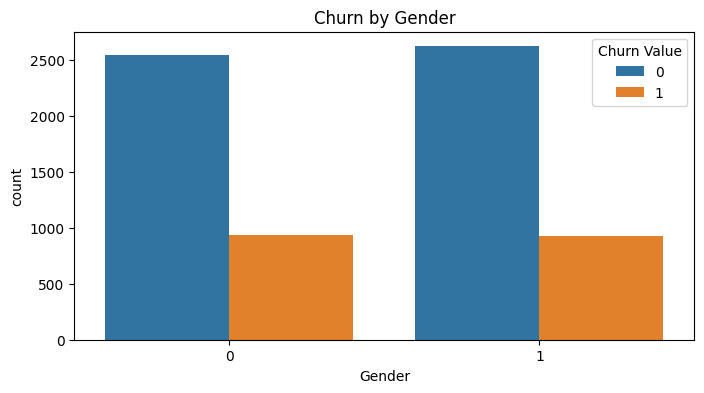

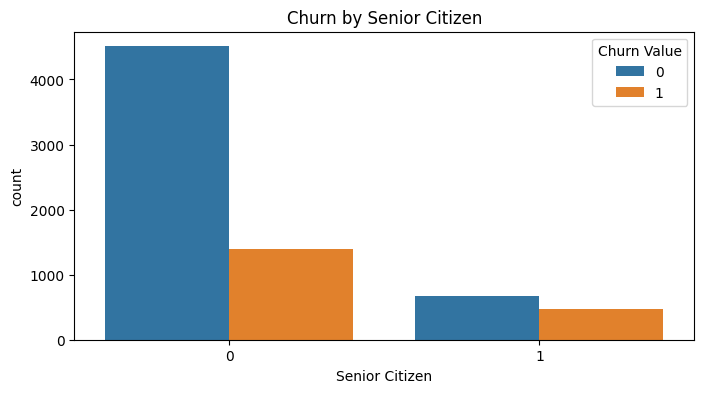

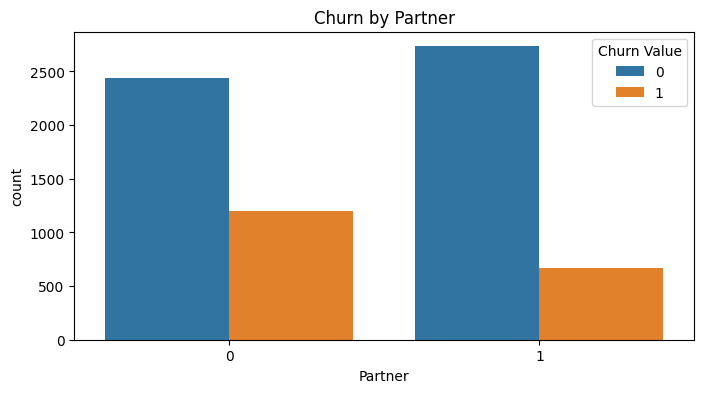

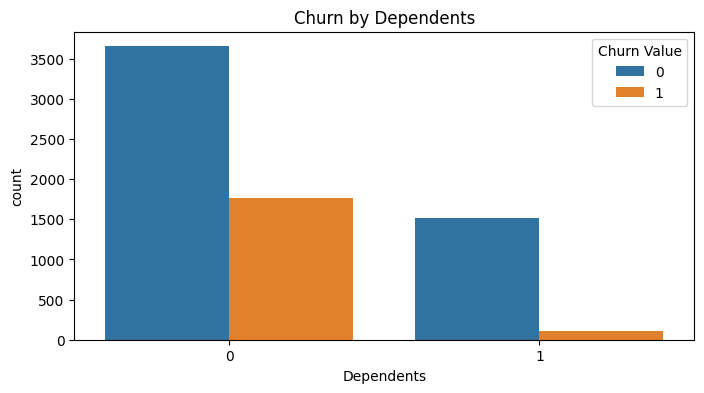

In [ ]:
demo_columns = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Churn Value']
demo_df = df[demo_columns]


for column in demo_columns[:-1]:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=column, hue='Churn Value', data=demo_df)
    plt.title(f'Churn by {column}')
    plt.show()

***# Service Utilization Analysis***

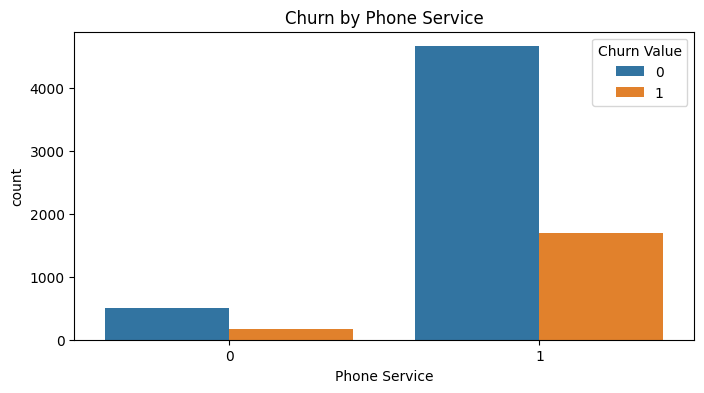

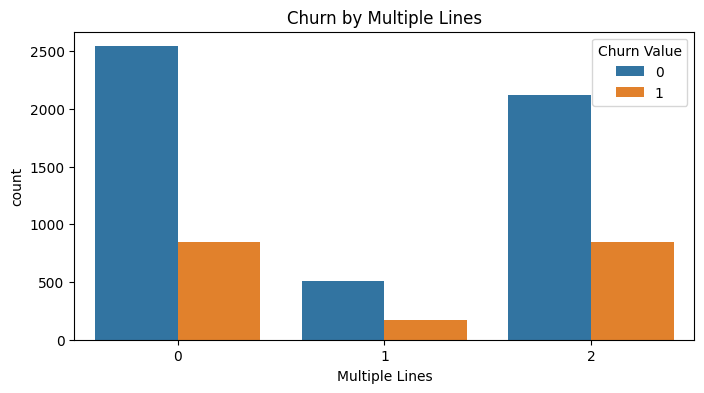

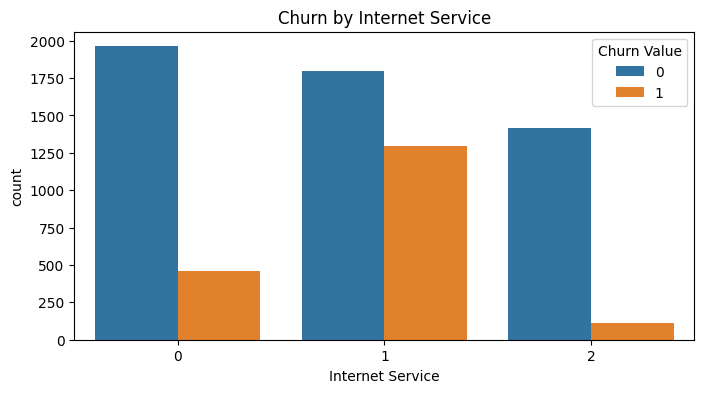

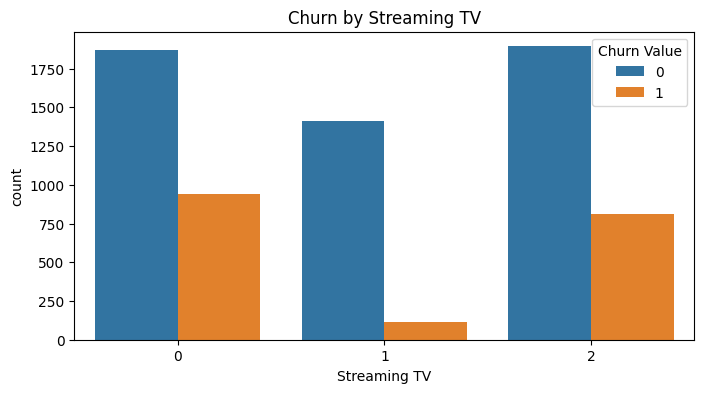

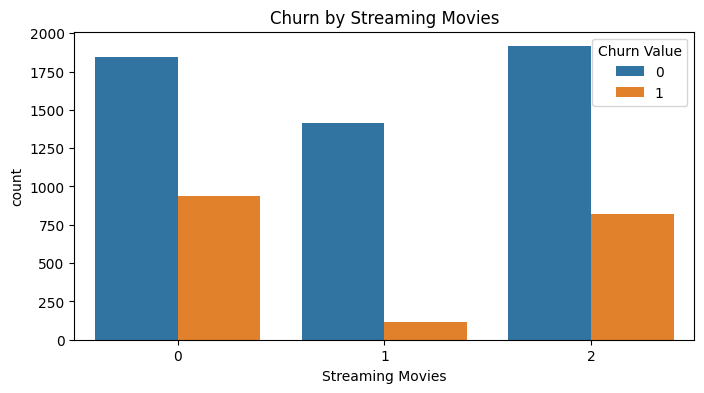

In [ ]:

service_columns = ['Phone Service', 'Multiple Lines', 'Internet Service', 'Streaming TV', 'Streaming Movies', 'Churn Value']
service_df = df[service_columns]


for column in service_columns[:-1]:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=column, hue='Churn Value', data=service_df)
    plt.title(f'Churn by {column}')
    plt.show()


# Pickel file for realtime prediction

Deployment Plan:

In [ ]:
import pickle
filename = 'customer_churn_model.sav'
pickle.dump(LR, open(filename, 'wb'))
# loading the saved model
loaded_model = pickle.load(open('customer_churn_model.sav', 'rb'))